<a href="https://github.com/matthewwang16czap/CS-GY-6613-AI/blob/89755db80a16148fa256ba9f5e9279c739502de6/Assignments/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`

Q1a: Number of employees approvals is a binomial random variable. So use Binomial Distribution:
$P(x) = \begin{pmatrix} n\\ x \end{pmatrix} \cdot p^{x} \cdot p^{n-x}$

$P(\sharp approvals = 25) = \begin{pmatrix} 50\\ 25 \end{pmatrix} \cdot 0.5^{25} \cdot 0.5^{25} \approx 0.1123$

Q1b: $n = 50 > 30, np = 25 > 5, n(1-p) = 25 > 5$, so CLT guarantees that we can use the Gaussian approximation.


$\mu = np = 50 \cdot 0.5 = 25$ and $\sigma^2 = np(1-p) = 50 \cdot 0.5 \cdot 0.5 = 12.5$.

Then we can find $z$ with $\mu = 25, \sigma = \sqrt{12.5}$:

$z_{left} = \frac{24.5 - 25}{\sqrt{12.5}} \approx -0.1414$

$z_{right} = \frac{25.5 - 25}{\sqrt{12.5}} \approx 0.1414$

$P(\sharp approvals = 25) = P(24.5 < \sharp approvals \leq 25.5) $

$= normCDF(-\infty, z_{right}, 0, 1) - normCDF(-\infty, z_{left}, 0, 1)$

$= \int_{-\infty}^{0.1414} X \sim N(0,1) \, dx - \int_{-\infty}^{-0.1414} X \sim N(0,1) \, dx$

$\approx 0.5562 - 0.4438 = 0.1124$

The probability using Gaussian approximation is very close to the probability using Binomial distribution.


## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`

$P(H) = P(T) = \frac{1}{2}$

$P(0|H) = \frac{1}{3}$

$P(1|H) = \frac{2}{3}$

$P(0|T) = \frac{5}{6}$

$P(1|T) = \frac{1}{6}$

$P(0) = P(0|H) \cdot P(H) + P(0|T) \cdot P(T) = \frac{1}{3} \cdot \frac{1}{2} + \frac{5}{6} \cdot \frac{1}{2} = \frac{7}{12}$

$P(1) = P(1|H) \cdot P(H) + P(1|T) \cdot P(T) = \frac{2}{3} \cdot \frac{1}{2} + \frac{1}{6} \cdot \frac{1}{2} = \frac{5}{12}$

0 and 1 are independent because $P(0|1) = P(0) = \frac{1}{2}$

$P(0011) = P(0) \cdot P(0) \cdot P(1) \cdot P(1) = \frac{7}{12} \cdot \frac{7}{12} \cdot \frac{5}{12} \cdot \frac{5}{12}
= \frac{1225}{20736} \approx 0.0591$

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


the bivariate normal distribution in the Example 6.6 is 
$p(x_1, x_2) = N(\begin{bmatrix}0 \\ 2 \end{bmatrix}, \begin{bmatrix}0.3 & -1 \\ -1 & 5 \end{bmatrix})$

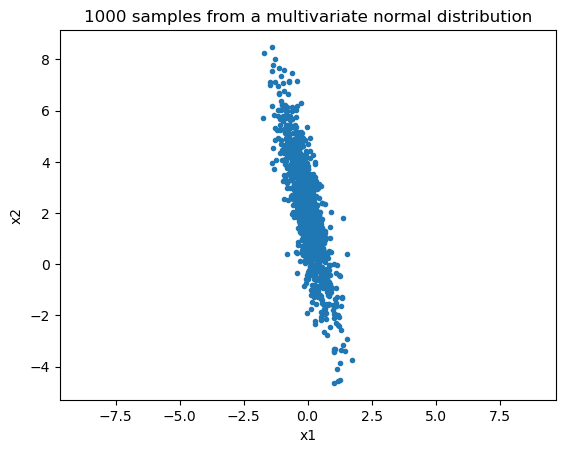

In [1]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.
import matplotlib.pyplot as plt
import numpy as np
mean = [0, 2]
cov = [[0.3, -1], [-1, 5]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x, y, '.')
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('1000 samples from a multivariate normal distribution')
plt.show()

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


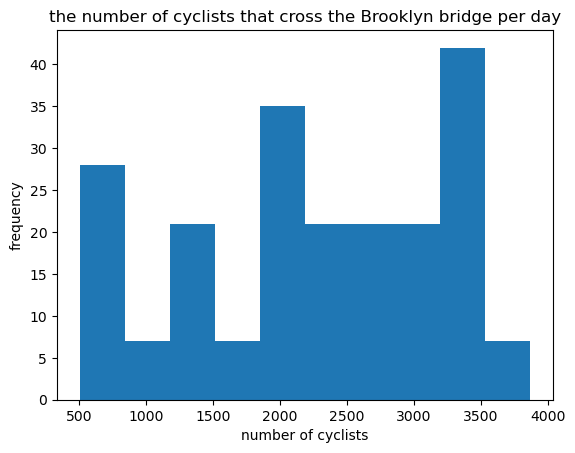

In [2]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('nyc-east-river-bicycle-counts.csv',header=0,na_values='?')
plt.hist(df['Brooklyn Bridge'])
plt.xlabel('number of cyclists')
plt.ylabel('frequency')
plt.title('the number of cyclists that cross the Brooklyn bridge per day')
plt.show() 

<del>The number of cyclists that cross the Brooklyn bridge per day is too large, so that it is computationally not possible to resemble with true mean value. I scale the size of the unit to see if it is possible to resemble.</del>

I use numpy's poisson sample API instead.

In [3]:
def poisson_sample(mu):
    e_to_neg_mu = np.exp(-mu)
    i = 0
    sample_p = np.random.uniform(0,1)
    target_p = e_to_neg_mu
    fact_i = 1
    mu_to_i = 1
    while sample_p > target_p:
        i = i + 1
        fact_i = fact_i*i
        mu_to_i = mu_to_i*mu
        target_p = target_p + e_to_neg_mu*(mu_to_i/fact_i)
    return i


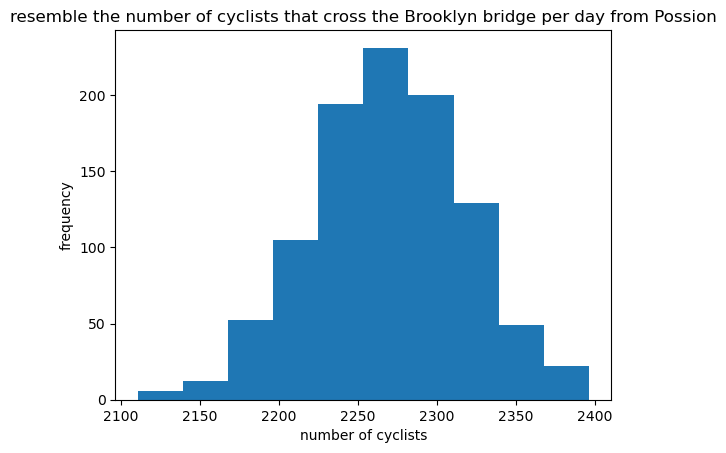

In [4]:
true_mu = df['Brooklyn Bridge'].mean()  # true_mu = 2269.63

'''
# generate 1000 samples
samples = []
chosen_mu = int(true_mu/10)
for i in range(2000):
    # here unit is 10
    samples.append(poisson_sample(chosen_mu)*10)
'''
samples = np.random.poisson(true_mu, 1000)
plt.hist(samples)
plt.xlabel('number of cyclists')
plt.ylabel('frequency')
plt.title('resemble the number of cyclists that cross the Brooklyn bridge per day from Possion')
plt.show()
  

# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

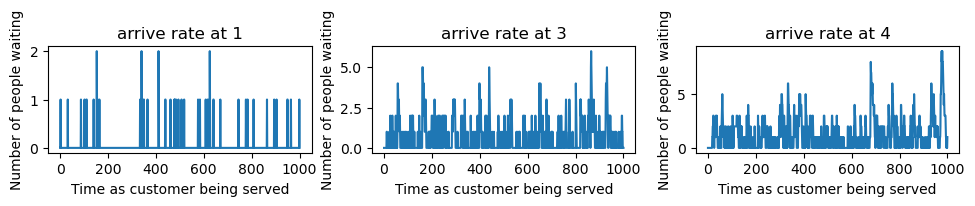

In [5]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.

def arrival_time_sample(arrival_rate):
    empty_time = 0
    poi_sample = np.random.poisson(arrival_rate)
    while poi_sample <= 0:
        poi_sample = np.random.poisson(arrival_rate)
        # if poisson sample get <= 0, means no one will arrive for a time
        empty_time += 1
    return  1/poi_sample + empty_time

def service_time_sample(service_rate):
    exp_sample = np.random.exponential(1/service_rate)
    if exp_sample <= 0:
        return 0
    else:
        return exp_sample
    

arrival_rates = [1,3,4]
service_rate = 4
number_in_queue_records = []

for arrival_rate in arrival_rates:    
    number_in_queue = 0
    it = 0
    number_in_queue_record = [0]
    next_arrival = arrival_time_sample(arrival_rate)
    next_service = service_time_sample(service_rate)
    while(1):
        if it >= 1000:
            break
        while next_arrival < next_service: 
            number_in_queue += 1
            next_arrival += arrival_time_sample(arrival_rate)
        number_in_queue -= 1          
        if number_in_queue > 0: 
            next_service += service_time_sample(service_rate)
        else: 
            # it is possible that no need to wait, so restore number to 0
            number_in_queue = 0
            next_service = next_arrival + service_time_sample(service_rate)
        number_in_queue_record.append(number_in_queue)
        it += 1
    number_in_queue_records.append(number_in_queue_record)  

fig, axs = plt.subplots(1, 3, figsize=(10,2))
for i, ax in enumerate(axs):
    ax.plot(range(len(number_in_queue_records[i])), number_in_queue_records[i])
    ax.set_xlabel('Time as customer being served')
    ax.set_ylabel('Number of people waiting')
    ax.set_title('arrive rate at ' + str(arrival_rates[i]))
fig.tight_layout()
plt.show();